In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('FinTech Data.csv')
dataset.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [3]:
X = dataset.iloc[:,0:16].values
X
y = dataset.iloc[:,16].values
y

array(['no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes',
       'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', '

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,0] = labelencoder.fit_transform(X[:,0])
X[:,2] = labelencoder.fit_transform(X[:,2])
X[:,5] = labelencoder.fit_transform(X[:,5])
X[:,6] = labelencoder.fit_transform(X[:,6])
X[:,15] = labelencoder.fit_transform(X[:,15])
X

array([[1, 6, 0, ..., 'skilled', 1, 1],
       [0, 48, 1, ..., 'skilled', 1, 0],
       [3, 12, 0, ..., 'unskilled', 2, 0],
       ...,
       [3, 12, 1, ..., 'skilled', 1, 0],
       [1, 45, 1, ..., 'skilled', 1, 1],
       [0, 45, 0, ..., 'skilled', 1, 0]], dtype=object)

In [5]:
y = labelencoder.fit_transform(y)
y

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([
    ("purpose", OneHotEncoder(), [3]),
    ("other_credit", OneHotEncoder(), [10]),
    ("housing", OneHotEncoder(), [11]),
    ("job", OneHotEncoder(), [13])
], remainder='passthrough')

In [7]:
X = ct.fit_transform(X)
X

array([[0.0, 0.0, 0.0, ..., 2, 1, 1],
       [0.0, 0.0, 0.0, ..., 1, 1, 0],
       [0.0, 0.0, 0.0, ..., 1, 2, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 1, 1, 0],
       [0.0, 0.0, 0.0, ..., 1, 1, 1],
       [0.0, 1.0, 0.0, ..., 1, 1, 0]], dtype=object)

In [9]:
X = pd.DataFrame(X, columns = ["checking_balance","months_loan_duration",
                               "credit_history","purpose_1","purpose_2",
                               "purpose_3","purpose_4","purpose_5","purpose_6",
"amount","savings_balance","employment_duration",
                               "percent_of_income","years_at_residence","age",
                               "other_credit_1","other_credit_2","other_credit_3",
                               "housing_1","housing_2","housing_3",
                               "existing_loans_count","job_1","job_2","job_3",
                               "job_4","dependents","phone"])
X

,checking_balance,months_loan_duration,credit_history,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,amount,...,housing_1,housing_2,housing_3,existing_loans_count,job_1,job_2,job_3,job_4,dependents,phone
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,1169,4,3,4,4,67,2,1,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,5951,2,0,2,2,22,1,1,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,2096,2,1,2,3,49,1,2,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,7882,2,1,2,4,45,1,2,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,3,4870,2,0,3,4,53,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,1736,2,1,3,4,31,1,1,0
996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1,3857,2,0,4,4,40,1,1,1
997,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,804,2,3,4,4,38,1,1,0
998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,1845,2,0,4,4,23,1,1,1


In [11]:
# Pass the labels to drop as a list
X = X.drop(["purpose_1","other_credit_1","housing_1","job_1"], axis = 1)
X

,checking_balance,months_loan_duration,credit_history,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,amount,savings_balance,...,other_credit_2,other_credit_3,housing_2,housing_3,existing_loans_count,job_2,job_3,job_4,dependents,phone
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1,6,1169,4,3,4,67,2,1,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,48,5951,2,0,2,22,1,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,12,2096,2,1,3,49,1,2,0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,42,7882,2,1,4,45,1,2,0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,24,4870,2,0,4,53,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,12,1736,2,1,4,31,1,1,0
996,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1,30,3857,2,0,4,40,1,1,1
997,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,3,12,804,2,3,4,38,1,1,0
998,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1,45,1845,2,0,4,23,1,1,1


In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
import statsmodels.api as sm
# Fitting Logistic Regression to the Training set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
## Statsmodel in Python forgets to add the Constant so do it manually here
classifier =sm.Logit(y_train,X_train)
model = classifier.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.523211
         Iterations 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  800
Model:                          Logit   Df Residuals:                      777
Method:                           MLE   Df Model:                           22
Date:                Fri, 23 Aug 2024   Pseudo R-squ.:                  0.1464
Time:                        14:07:38   Log-Likelihood:                -418.57
converged:                       True   LL-Null:                       -490.37
Covariance Type:            nonrobust   LLR p-value:                 7.608e-20
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0120      0.090    -11.254      0.000      -1.188      -0.836
x1            -0.2025      0.130     -1.555      0.120      -0.458       0.053
x2            -0.2494      0.167     -1.489      0.136      -0.578       0.079
x3            -0.1093      0.093     -1.175      0.240      -0.292       0.073
x4            -0.3961      0.176     -2.255      0.024      -0.740      -0.052
x5            -0.0289      0.092     -0.313      0.754      -0.210       0.152
x6             0.0602   3.65e+06   1.65e-08      1.000   -7.15e+06    7.15e+06
x7            -0.1143   4.11e+06  -2.78e-08      1.000   -8.05e+06    8.05e+06
x8             0.1118   2.23e+06   5.01e-08      1.000   -4.38e+06    4.38e+06
x9            -0.0396   2.49e+06  -1.59e-08      1.000   -4.87e+06    4.87e+06
x10           -0.1095   3.64e+06  -3.01e-08      1.000   -7.14e+06    7.14e+06
x11            0.1608   3.09e+06    5.2e-08      1.000   -6.06e+06    6.06e+06
x12            0.1225      0.121      1.008      0.313      -0.116       0.361
x13            0.0164      0.110      0.148      0.882      -0.200       0.233
x14           -0.0044      0.091     -0.049      0.961      -0.183       0.174
x15           -0.6211      0.091     -6.812      0.000      -0.800      -0.442
x16            0.4928      0.112      4.382      0.000       0.272       0.713
x17            0.0470      0.113      0.415      0.678      -0.175       0.269
x18           -0.2235      0.090     -2.495      0.013      -0.399      -0.048
x19           -0.0211      0.095     -0.221      0.825      -0.208       0.165
x20           -0.0379      0.093     -0.405      0.685      -0.221       0.145
x21           -0.1114      0.100     -1.117      0.264      -0.307       0.084
x22           -0.0459      0.091     -0.505      0.614      -0.224       0.132
x23            0.0713      0.086      0.830      0.406      -0.097       0.240
x24           -0.1996      0.100     -2.001      0.045      -0.395      -0.004
==============================================================================
"""

Accuracy: 0.745


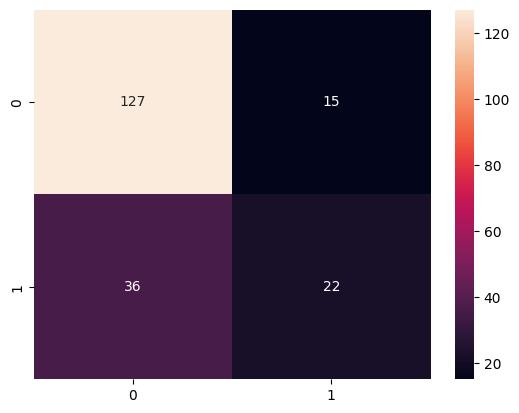

In [19]:
import seaborn as sns
from sklearn import metrics
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.50)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt='');